In [2]:
# DAY 13

In [ ]:
# With one of the above mentioned dataset perform linear regression without importing it.
# Linear regression should not be directly imported

In [1]:
import numpy as np 
import pandas as pd

In [2]:
df=pd.read_csv('./boston_house/HousingData.csv')
print(df.head())

      CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD  TAX  PTRATIO  \
0  0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900    1  296     15.3   
1  0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671    2  242     17.8   
2  0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671    2  242     17.8   
3  0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622    3  222     18.7   
4  0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622    3  222     18.7   

        B  LSTAT  MEDV  
0  396.90   4.98  24.0  
1  396.90   9.14  21.6  
2  392.83   4.03  34.7  
3  394.63   2.94  33.4  
4  396.90    NaN  36.2  


In [3]:
df = df.dropna() 

In [26]:
x=df.drop('MEDV',axis=1).values
y = df['MEDV'].values.reshape(-1, 1) 

In [38]:
ones = np.ones((x.shape[0], 1))      
x_new = np.concatenate((ones, x), axis=1)

In [40]:
x_t = x_new.T
xtx = x_t.dot(x_new)
xtx_inv = np.linalg.inv(xtx)
xty = x_t.dot(y)
theta = xtx_inv.dot(xty)

In [41]:
y_pred = X_new.dot(theta)


In [42]:
error = y - y_pred
mse = np.mean(error ** 2)
print("Mean Squared Error:", mse)

Mean Squared Error: 19.418397930734912


In [31]:
# DAY 14

In [ ]:
# Load the CSV file into a DataFrame
#  Print the dataset shape
# Print unique species

In [34]:
df.shape

(394, 14)

In [36]:
if 'species' in df.columns:
    print("Unique Species are:",df['species'].unique())
else:
    print("No common Speices!")

No common Speices!


In [ ]:
# DAY 15

In [ ]:
# Encode the species column using LabelEncoder
# Separate features and target variable
# Split the dataset into train and test sets (80/20)
# Normalize the feature values

In [4]:
from sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn.model_selection import train_test_split

In [5]:
x=df.drop('MEDV',axis=1).values
y = df['MEDV']

In [6]:
lab=LabelEncoder()
y_pred= lab.fit_transform(y)

In [7]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [ ]:
# Normalize feature scales

In [8]:
nor=StandardScaler()
x_train=nor.fit_transform(x_train)
x_test=nor.fit_transform(x_test)

In [ ]:
# DAY 16

In [ ]:
# Import and initialize GaussianNB
# Train the Naive Bayes classifier on the training set
# Predict labels for the test set
# Print predicted vs actual values

In [10]:
from sklearn.naive_bayes import GaussianNB

In [14]:
y = pd.cut(df['MEDV'], bins=[0, 20, 35, 50], labels=[0, 1, 2])
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [15]:
model=GaussianNB()
model.fit(x_train,y_train)

GaussianNB()

In [16]:
model.predict(x_test)

array([1, 1, 1, 1, 1, 2, 1, 2, 2, 0, 1, 2, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1,
       0, 2, 1, 0, 1, 2, 0, 1, 2, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 2, 0, 2,
       2, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 2, 1, 1, 1, 1, 1, 0, 1, 0, 2,
       0, 2, 1, 1, 2, 2, 1, 0, 0, 2, 0, 2, 1], dtype=int64)

In [20]:
print("Actual value:\n",y_test)
print("Predicted vlause:",y_pred)

Actual value:
 93     1
352    0
319    1
65     1
499    0
      ..
470    0
97     2
137    0
3      1
22     0
Name: MEDV, Length: 79, dtype: category
Categories (3, int64): [0 < 1 < 2]
Predicted vlause: [129 106 178 175 154 146  58  49  80 107  95  90 121  66  93  73  37  87
  51  45  53  39  59  47  75 101  29  45  33  32  36 101 136 163 179 143
 139 103  84  91  44  85  88 138  80 182 136 166 123  87  78  54 112 138
 173 124  85 110  65 100 131 107 118 104  91  99 103 148 128 137 119 128
 143 115 125 154 116 110 138  97 151 104 191 198 174 147 142  77  92  86
  86  95  89  85 107 118  79  78  76  83 110  94  96  79 104  56  71  43
  83  87 120  53  72  65  63  69  40  44  35  53  24  38  52  87  85  62
  32 132 123 145 204 204 117 138 204 127 113  65  82 121 116 157 122 160
 188 192 185 190 141 158 168 159 179 187 156 204 162 177 179 172 130 194
 203 204 133  91  84 114 149 126 123 154 105 144 107 147 161 200 204 166
 132 167 193 155 129 165 123 112 126  67 132  96 134 140 133 13

In [ ]:
# DAY 17

In [ ]:
# Calculate model accuracy
# Display the confusion matrix
# Plot the confusion matrix visually

In [23]:
from sklearn.metrics import accuracy_score

In [36]:
y_pred = model.predict(x_test) 
acc = accuracy_score(y_test, y_pred)
print("Accuracy of this model is:", acc)


Accuracy of this model is: 0.5949367088607594


In [30]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

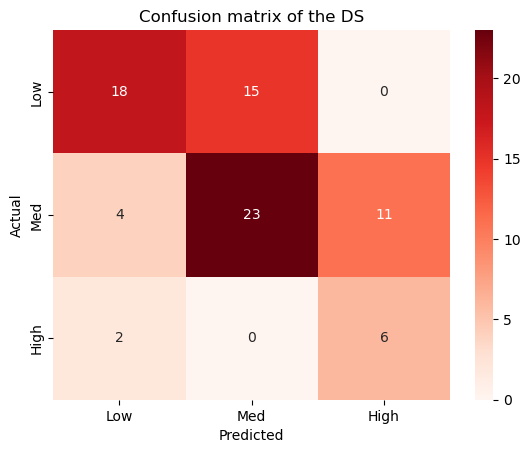

In [35]:
conf=confusion_matrix(y_test,y_pred)

plt.title('Confusion matrix of the DS')
sns.heatmap(conf,annot=True, fmt='d', cmap='Reds', xticklabels=['Low', 'Med', 'High'], yticklabels=['Low', 'Med', 'High'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [ ]:
# DAY 18

In [ ]:
# Generate classification report
# Evaluate the model using cross-validation
# Plot a bar graph of prediction probabilities

In [41]:
from sklearn.metrics import classification_report

In [39]:
print("Clasiification Report for above is:\n",classification_report(y_test, y_pred, target_names=['Low', 'Medium', 'High']))

Clasiification Report for above is:
               precision    recall  f1-score   support

         Low       0.75      0.55      0.63        33
      Medium       0.61      0.61      0.61        38
        High       0.35      0.75      0.48         8

    accuracy                           0.59        79
   macro avg       0.57      0.63      0.57        79
weighted avg       0.64      0.59      0.60        79



In [42]:
from sklearn.model_selection import cross_val_score

In [43]:
cvs=cross_val_score(model, x, y, cv=5, scoring='accuracy')

print("Cross validation :",cvs)

Cross validation : [0.56962025 0.72151899 0.64556962 0.91139241 0.62820513]


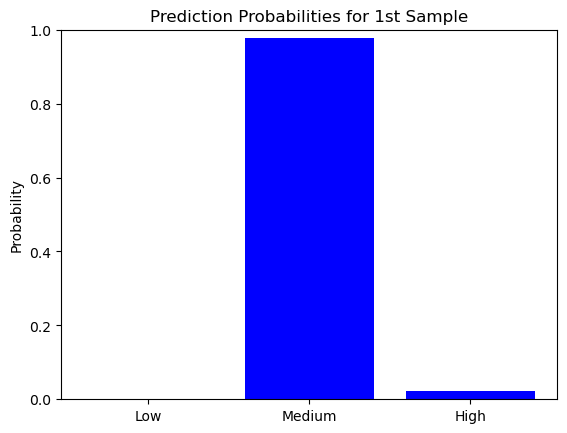

In [45]:
prob = model.predict_proba([x_test[0]])[0]
plt.bar(['Low', 'Medium', 'High'], prob, color='blue')
plt.title('Prediction Probabilities for 1st Sample')
plt.ylabel('Probability')
plt.ylim(0, 1)
plt.show()


In [ ]:
# DAY 19

In [ ]:
# Compare accuracy with Logistic Regression
# Tune the model using different feature subsets(Try training the model with only 2 or 3 features and compare performance.)
# Plot pairplots colored by model predictions

In [50]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [64]:
log_model = LogisticRegression(max_iter=1000)
log_model.fit(x_train, y_train)

LogisticRegression(max_iter=1000)

In [65]:
y_pred = log_model.predict(x_test)
accuracy = accuracy_score(y_test, y_pred)
print("Logistic Regression Accuracy:", accuracy)

Logistic Regression Accuracy: 0.759493670886076


In [68]:
x_train_subset = x_train.iloc[:, :2]
x_test_subset = x_test.iloc[:, :2]

log_model_small = LogisticRegression(max_iter=1000)
log_model_small.fit(x_train_subset, y_train)

y_pred_small = log_model_small.predict(x_test_subset)
acc_small = accuracy_score(y_test, y_pred_small)
print("Accuracy with 2 features:", acc_small)


Accuracy with 2 features: 0.7974683544303798


In [69]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

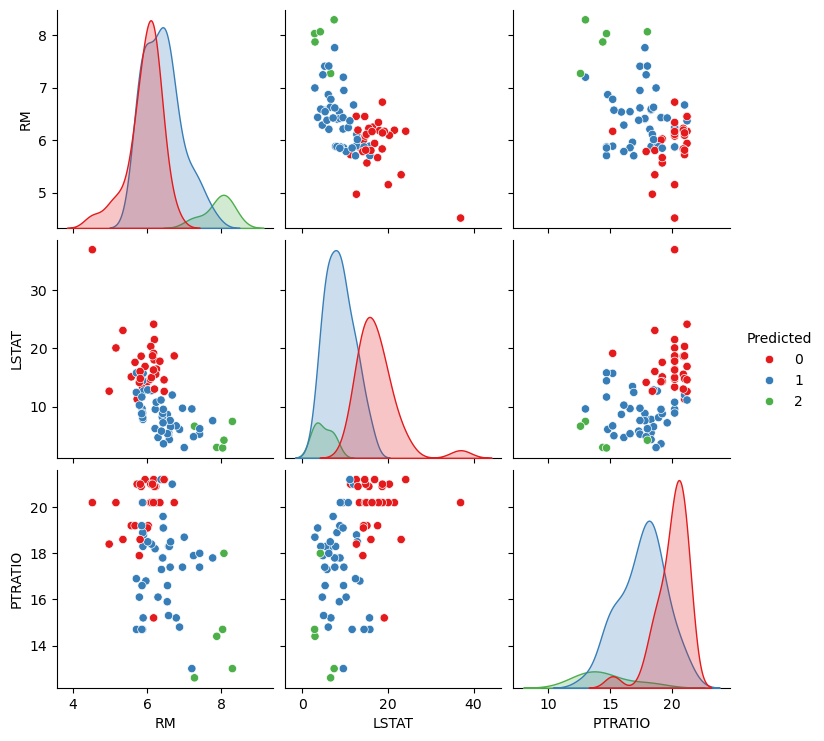

In [75]:
df_plot = x_test.copy()
df_plot['Predicted'] = y_pred  

sns.pairplot(df_plot, hue='Predicted', palette='Set1')
plt.show()
